# Assignment 5 Vectors, Matrices, and Neural Networks

## Question 1: Vector length and Dot Product

Three vectors: $\mathbf{u} = (-.6, .8)$, $\mathbf{v} = (3,4)$, and $\mathbf{w} = (8, 6)$.

1. Calculate the dot products $\mathbf{u} \cdot \mathbf{v}$, $\mathbf{w} \cdot \mathbf{v}$, and $\mathbf{u} \cdot ( \mathbf{w} + \mathbf{v} )$

In [2]:
import numpy as np
u = np.array([-.6,.8])
v = np.array([3,4])
w = np.array([8,6])

u[0]*v[0] +  u[1]*v[1]

1.4000000000000004

this can also be calculated using numpy function dot

In [3]:
np.dot(u,v)

1.4000000000000004

In [4]:
w[0]*v[0] +  w[1]*v[1]

48

In [5]:
u[0]*(w+v)[0] +  u[1]*(w+v)[1]

1.4000000000000004

2. Compute the lengths of vectors $||\mathbf{u}||$, $||\mathbf{v}||$ and $||\mathbf{w}||$ given above.

length of vector x is is $\sqrt{ x\cdot x}$, so 

In [6]:
np.sqrt(np.dot(u,u))

1.0

In [7]:
np.sqrt(np.dot(v,v))

5.0

In [8]:
np.sqrt(np.dot(w,w))

10.0

3. Find unit length vectors in the directions of $\mathbf{v}$ and $\mathbf{w}$ (for this use the fact that $\frac{\mathbf{x}}{||\mathbf{x}||}$ has unit length)

Dividing all components of a verctor by the length of the vector resuts in a unit vector. In fact $||r \mathbf{v}||$ = $r || \mathbf{v}||$, if r is equal to $1/||\mathbf{v}||$, then $||r \mathbf{v}||$=1

In [9]:
v/np.sqrt(np.dot(v,v))

array([0.6, 0.8])

In [10]:
w/np.sqrt(np.dot(w,w))

array([0.8, 0.6])

4. Find vectors that have angles $\theta=0\deg,90\deg,180\deg$ with the vector $\mathbf{w}$.  

Recall that $\mathbf{w}\cdot\mathbf{x} = ||\mathbf{w}|| ||\mathbf{x}||  cos\theta$. We need to find vectors $\mathbf{x}$, $\mathbf{y}$, $\mathbf{z}$ that are aligned with w, perpendicular with w and opposite to w respectively. For example
$\mathbf{x = w}$, $\mathbf{y = (6,-8)}$ and $\mathbf{z = -w}$ 

5. How long is the vector $v=(1,1,\cdots,1)$ in 30 dimensions?

using the formula for length $\sqrt{\sum_{i=1}^{30} 1} = \sqrt{30}$

## Question 2: Classification with the Perceptron and the Perceptron Learning Rule

Suppose we would like to separate members of the family MacDonalds from the members of the family Campbells using 3 features (inputs):
$x_1$: eye separation
$x_2$: mouth height
$x_3$: nose length

Data samples: 
- (1. ,0.1 ,.4), type 'Campbells' 
- (.9 ,0.15,.3), type 'Campbells'
- (1. ,0.11 ,.35), type 'MacDonalds' 
- (1.1,0.09,.42), type 'MacDonalds'

- Is this problem linearly separable? Why?

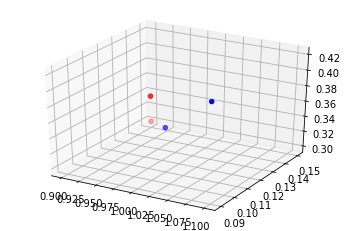

In [11]:
%matplotlib inline  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

d_1 = (1., .1, .4)
d_2 = (.9, .15, .3)
d_3 = (1., .11, .35)
d_4 = (1.1, .09, .42)
D = np.row_stack([d_1,d_2,d_3,d_4])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(D[:,0], D[:,1], D[:,2], zdir='z', s=20, c=['r','r','b','b'], depthshade=True)

The criterion for linear separability is that a plane ("sheet of paper") can be passed through red and blue

- Find the weights $w_1, w_2, w_3, b$ of one perceptron using the data above

we need to find weights such that $y(\mathbf{w} \cdot \mathbf{d_1} + b)=1$, $y(\mathbf{w} \cdot \mathbf{d_2})=1$, $y(\mathbf{w} \cdot \mathbf{d_3} + b)=-1$, $y(\mathbf{w} \cdot \mathbf{d_4})=-1$

Since y is the result of a step function that flips at 0, we simply need to check the sign of the neuron input, i.e. $\mathbf{w\cdot x} + b$

In [12]:
w= np.array([-5.48,   4.744,  7.15 ])

w1=3.61
w2=36.08
w3=9.02
b=1
w = np.array([w1,w2,w3])

In [13]:
y1 = (np.dot(w,d_1) + b)>0
y2 = (np.dot(w,d_2) + b)>0
y3 = (np.dot(w,d_3) + b)<0 
y4 = (np.dot(w,d_4) + b)<0 
print(y1,y2,y3,y4)

True True False False


- Bonus points: write the perceptron weight update with $\eta=.1$. 

In [14]:
#initial weight
w=np.array([-.5,.1,.25])
b=.75
target = np.array([1,1,-1,-1])
d = np.array([d_1,d_2,d_3,d_4])
y = np.array([y1,y2,y3,y4])
while not np.all(y==target): #all checks if all arguments are True. 
    y1 = np.sign(np.dot(w,d_1) + b)
    y2 = np.sign(np.dot(w,d_2) + b)
    y3 = np.sign(np.dot(w,d_3) + b)
    y4 = np.sign(np.dot(w,d_4) + b)
    y = np.array([y1,y2,y3,y4])
    w += .1 * np.dot((target-y),d)
    b += .1 * np.dot((target-y),np.ones(4))